In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


In [28]:
df=pd.read_csv('../data/vente_car_bi_hatem.csv',delimiter=';')



# 1-Data Understanding

## 1.1 Data info

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364109 entries, 0 to 364108
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ANCSCP  364109 non-null  int64 
 1   NOMCLI  364109 non-null  object
 2   DATLIV  364109 non-null  object
 3   LIBGVR  364109 non-null  object
 4   LIBLOC  364109 non-null  object
 5   LIBPRD  364109 non-null  object
 6   QTEPRD  364106 non-null  object
 7   MNTHT   364106 non-null  object
dtypes: int64(1), object(7)
memory usage: 22.2+ MB


<b>ANCSCP</b>: Client Code  <br>
<b>LIBPRD</b>: type of product that will be delivered <br>
<b>DATLIV</b>: delivery date<br>
<b>LIBGVR</b>: governorate of gas station<br>
<b>LIBLOC</b>: region of gas station<br>
<b>MNTHT</b>: total amount to be paid excluding tax<br>
<b>QTEPRD</b>: total quantity delivered<br>
<b>prixHT</b>: unit price<br>

In [30]:
df['NOMCLI'] = df['NOMCLI'].str.strip()
df['NOMCLI'].unique().size


247

In [31]:
df['NOMCLI'].value_counts()


NOMCLI
TAIEB BEN SMAIL                      6525
STE MOHAMED BEN AMRI "SMBA"          5446
STE SOFIBEL                          4854
HEDI EL HADEF                        4777
AHMED NACHI                          4568
                                     ... 
SOCIETE SAGES RAS JEBEL                 7
STE EL MOSTAKBEL BECHIR AJJABI          5
SOCIETE SAGES  PK29 SUD EL GRIAAT       4
ABDELKADER BEN HASSEN ACHOUR            4
ALI BEN HATTAB BEN HASSINE              2
Name: count, Length: 247, dtype: int64

In [32]:
df['QTEPRD']=df['QTEPRD'].str.replace(',','.')

df['QTEPRD']=pd.to_numeric(df['QTEPRD'],errors='raise')


In [33]:
df['MNTHT']=df['MNTHT'].str.replace(',','.')
df['MNTHT']=pd.to_numeric(df['MNTHT'],errors='coerce')


In [34]:
df['LIBPRD'].value_counts()

LIBPRD
TIMBRE LOI 54 du 19/08/2014    98496
GASOIL                         93122
SSP SUPER SANS PLOMB           81755
GASOIL 50                      40823
Timbre Loi Fin.2018            27790
GAZOIL SANS SOUFRE             15702
PETROLE                         4916
AGILIX PREMIUM ESSENCE           591
APS AGILIX PREMIUM ESS.          498
AGILIX PREMIUM GASOIL            209
APG AGILIX PREMIUM GAS.          207
Name: count, dtype: int64

In [35]:
df.loc[df["LIBPRD"] == "AGILIX PREMIUM ESSENCE", "LIBPRD"] = "APS AGILIX PREMIUM ESS."
df.loc[df["LIBPRD"] == "AGILIX PREMIUM GASOIL", "LIBPRD"] = "APG AGILIX PREMIUM GAS."
valeurs_a_supprimer = ["B.T.S", "PETROLE BUTIMES", "FOL", "WHITE SPIRIT","PETROLE"]



df = df[~df["LIBPRD"].isin(valeurs_a_supprimer)]

In [36]:
df = df.assign(
    prixHT=lambda x: x.apply(
        lambda row: 0 if row['MNTHT'] < 0 or row['QTEPRD'] == 0 else row['MNTHT'] / row['QTEPRD'], 
        axis=1
    )
)

In [37]:
df=df[df['prixHT']>0]

## 1.2 Null Values:

In [38]:
df.isnull().values.any()


False

In [39]:
df=df[df['MNTHT']>0]

In [40]:
df

,ANCSCP,NOMCLI,DATLIV,LIBGVR,LIBLOC,LIBPRD,QTEPRD,MNTHT,prixHT
1,5452,SADOK BEN SALHA,02/01/2017,NABEUL,MENZEL TEMIME,GASOIL,12.0,11617.500,968.125
4,5452,SADOK BEN SALHA,05/01/2017,NABEUL,MENZEL TEMIME,GASOIL 50,8.0,9732.144,1216.518
7,5452,SADOK BEN SALHA,15/03/2017,NABEUL,MENZEL TEMIME,GASOIL,9.0,8713.125,968.125
8,5452,SADOK BEN SALHA,13/01/2017,NABEUL,MENZEL TEMIME,GASOIL,7.0,6776.875,968.125
9,5452,SADOK BEN SALHA,13/01/2017,NABEUL,MENZEL TEMIME,GASOIL,15.0,14521.875,968.125
...,...,...,...,...,...,...,...,...,...
364101,5364,ANIS KACEM,24/12/2019,BEN AROUS,FOUCHANA,SSP SUPER SANS PLOMB,5.0,8343.695,1668.739
364102,5364,ANIS KACEM,24/12/2019,BEN AROUS,FOUCHANA,GASOIL,11.0,14640.703,1330.973
364104,5364,ANIS KACEM,23/12/2019,BEN AROUS,FOUCHANA,GAZOIL SANS SOUFRE,3.0,4665.132,1555.044
364105,5364,ANIS KACEM,23/12/2019,BEN AROUS,FOUCHANA,SSP SUPER SANS PLOMB,4.0,6674.956,1668.739


## 1.3 Duplicates values


### Remove duplicates


In [41]:

duplicates = df[df.duplicated(keep=False)]
print("Duplicated rows:")
duplicates

Duplicated rows:


,ANCSCP,NOMCLI,DATLIV,LIBGVR,LIBLOC,LIBPRD,QTEPRD,MNTHT,prixHT
129,5452,SADOK BEN SALHA,17/02/2017,NABEUL,MENZEL TEMIME,GASOIL 50,3.0,3649.554,1216.518
160,5452,SADOK BEN SALHA,17/02/2017,NABEUL,MENZEL TEMIME,GASOIL 50,3.0,3649.554,1216.518
2117,5452,SADOK BEN SALHA,12/01/2019,NABEUL,MENZEL TEMIME,GASOIL,10.0,12553.100,1255.310
2126,5452,SADOK BEN SALHA,12/01/2019,NABEUL,MENZEL TEMIME,GASOIL,10.0,12553.100,1255.310
3411,5538,SABIHA CHOUCHANE,21/03/2017,ARIANA,ARIANA,GASOIL,6.0,5808.750,968.125
...,...,...,...,...,...,...,...,...,...
359770,5356,STE SOFIBEL,14/04/2019,MAHDIA,EL JEM,GAZOIL SANS SOUFRE,4.0,6229.028,1557.257
360149,5356,STE SOFIBEL,08/06/2019,MAHDIA,EL JEM,SSP SUPER SANS PLOMB,4.0,6683.360,1670.840
360211,5356,STE SOFIBEL,08/06/2019,MAHDIA,EL JEM,SSP SUPER SANS PLOMB,4.0,6683.360,1670.840
360636,5356,STE SOFIBEL,09/09/2019,MAHDIA,EL JEM,GASOIL,20.0,26619.460,1330.973


In [42]:
df=df.drop_duplicates()
print("Shape of dataset after removing duplicates:",df.shape)

Shape of dataset after removing duplicates: (232111, 9)


## 1.4 Data Vizualiastion


In [43]:
qt=df.groupby(['LIBGVR']).sum('QTEPRD')



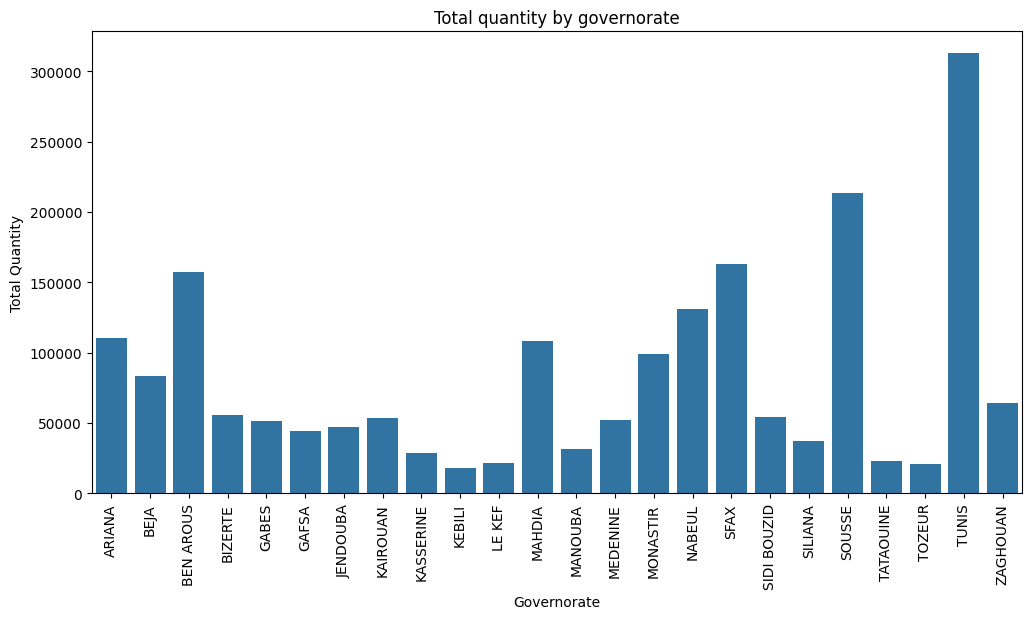

In [44]:
import seaborn as sns
# Visualisation par gouvernorat
plt.figure(figsize=(12, 6))
sns.barplot(x='LIBGVR', y='QTEPRD', data=qt)
plt.title('Total quantity by governorate')
plt.xlabel('Governorate')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

## <i>Interpretation</i>
Tunis consumes more fuel than other governorate and this reflects : <br>
    -the high density population for tunisia's capital <br>
    -the high economic activity<br>



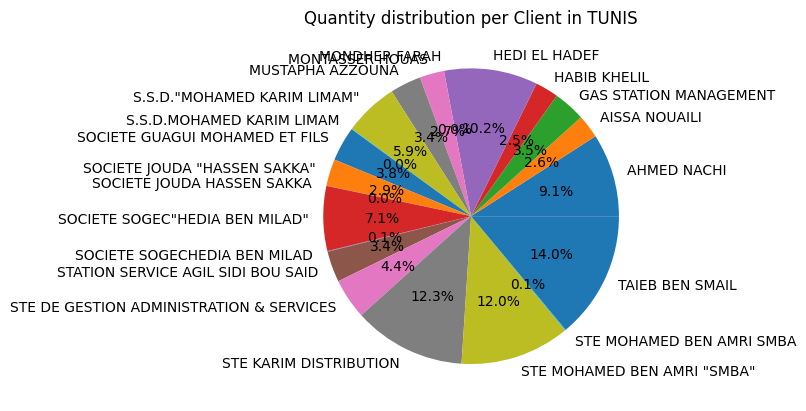

In [45]:
df_tunis = df[df["LIBGVR"] == "TUNIS"]
df_somme_client = df_tunis.groupby(["NOMCLI"])["QTEPRD"].sum()
plt.pie(df_somme_client.values, labels=df_somme_client.index, autopct="%1.1f%%")
plt.title("Quantity distribution per Client in TUNIS")
plt.show()

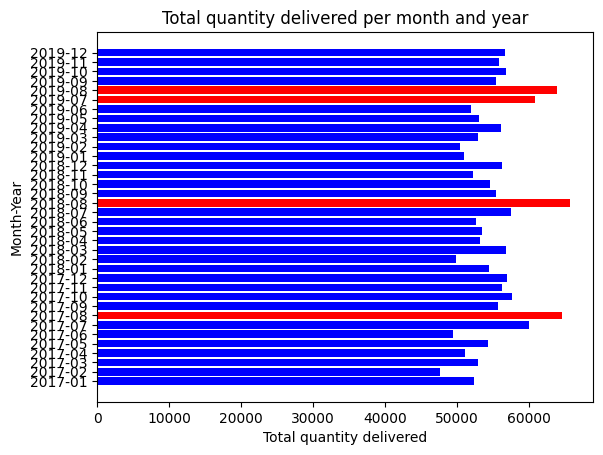

In [46]:
import matplotlib.pyplot as plt

df['DATLIV'] = pd.to_datetime(df['DATLIV'], format='%d/%m/%Y')

# Extraire le mois et l'année de DATLIV
df['Month_Year'] = df['DATLIV'].dt.to_period('M')

# Grouper par mois et année et calculer la somme des quantités livrées
df_somme_mensuelle = df.groupby("Month_Year")["QTEPRD"].sum()
colors = ['red' if quantity > 60000 else 'blue' for quantity in df_somme_mensuelle]

# Créer un graphique en barres horizontales
plt.barh(df_somme_mensuelle.index.astype(str), df_somme_mensuelle,color=colors)
plt.xlabel("Total quantity delivered")
plt.ylabel("Month-Year")
plt.title("Total quantity delivered per month and year")
plt.show()

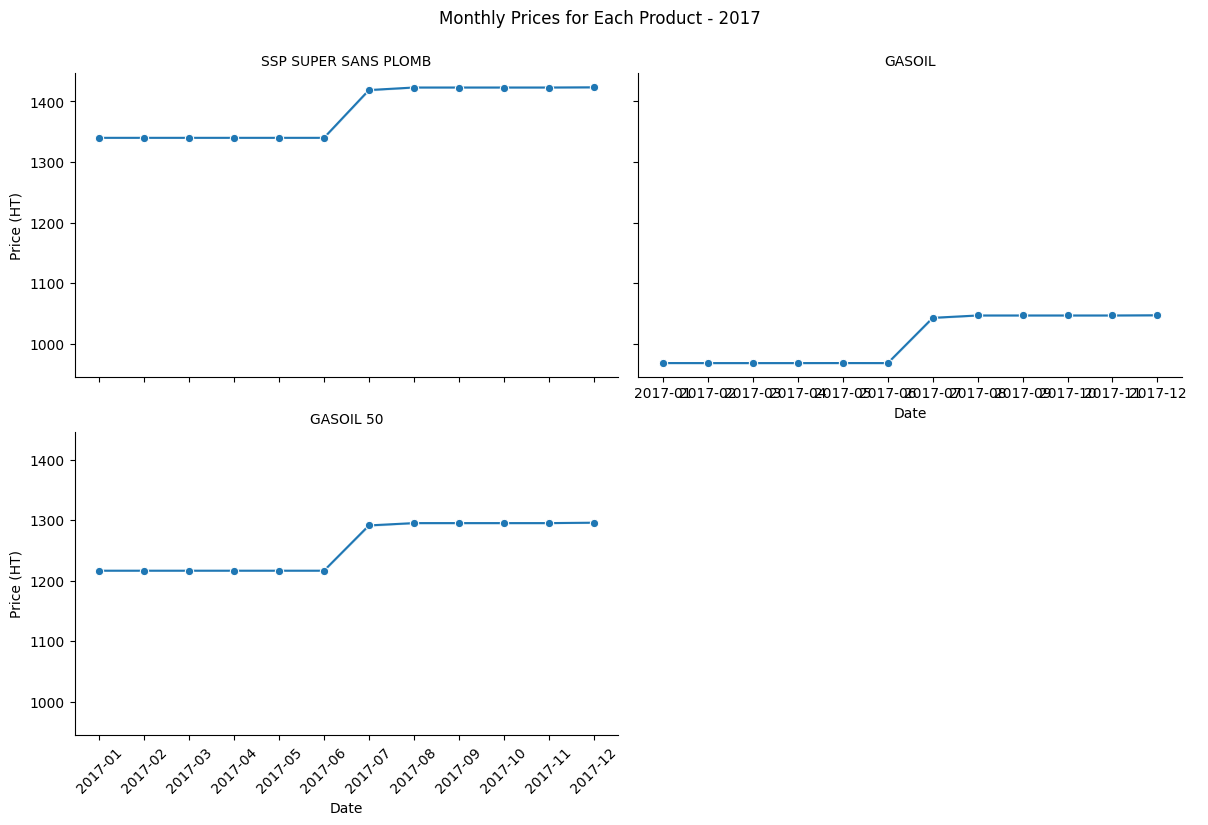

In [54]:
df['DATLIV'] = pd.to_datetime(df['DATLIV'], format='%d/%m/%Y')
df['Month_Year'] = df['DATLIV'].dt.to_period('M')
df['Month_Year_Str'] = df['Month_Year'].astype(str)

# Create a boolean mask for dates between 01-2017 and 12-2017
mask = (df['DATLIV'].dt.year >= 2017) & (df['DATLIV'].dt.year <= 2017)

# Filter the dataframe using the mask
df_filtered = df[mask]
df_filtered= df_filtered.sort_values(by="DATLIV")

# Créer le graphique en utilisant seaborn
g = sns.FacetGrid(df_filtered, col="LIBPRD", col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, "Month_Year_Str", "prixHT", marker='o')
g.set_axis_labels("Date", "Price (HT)")
g.set_titles("{col_name}")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Prices for Each Product - 2017')
plt.xticks(rotation=45)
plt.show()

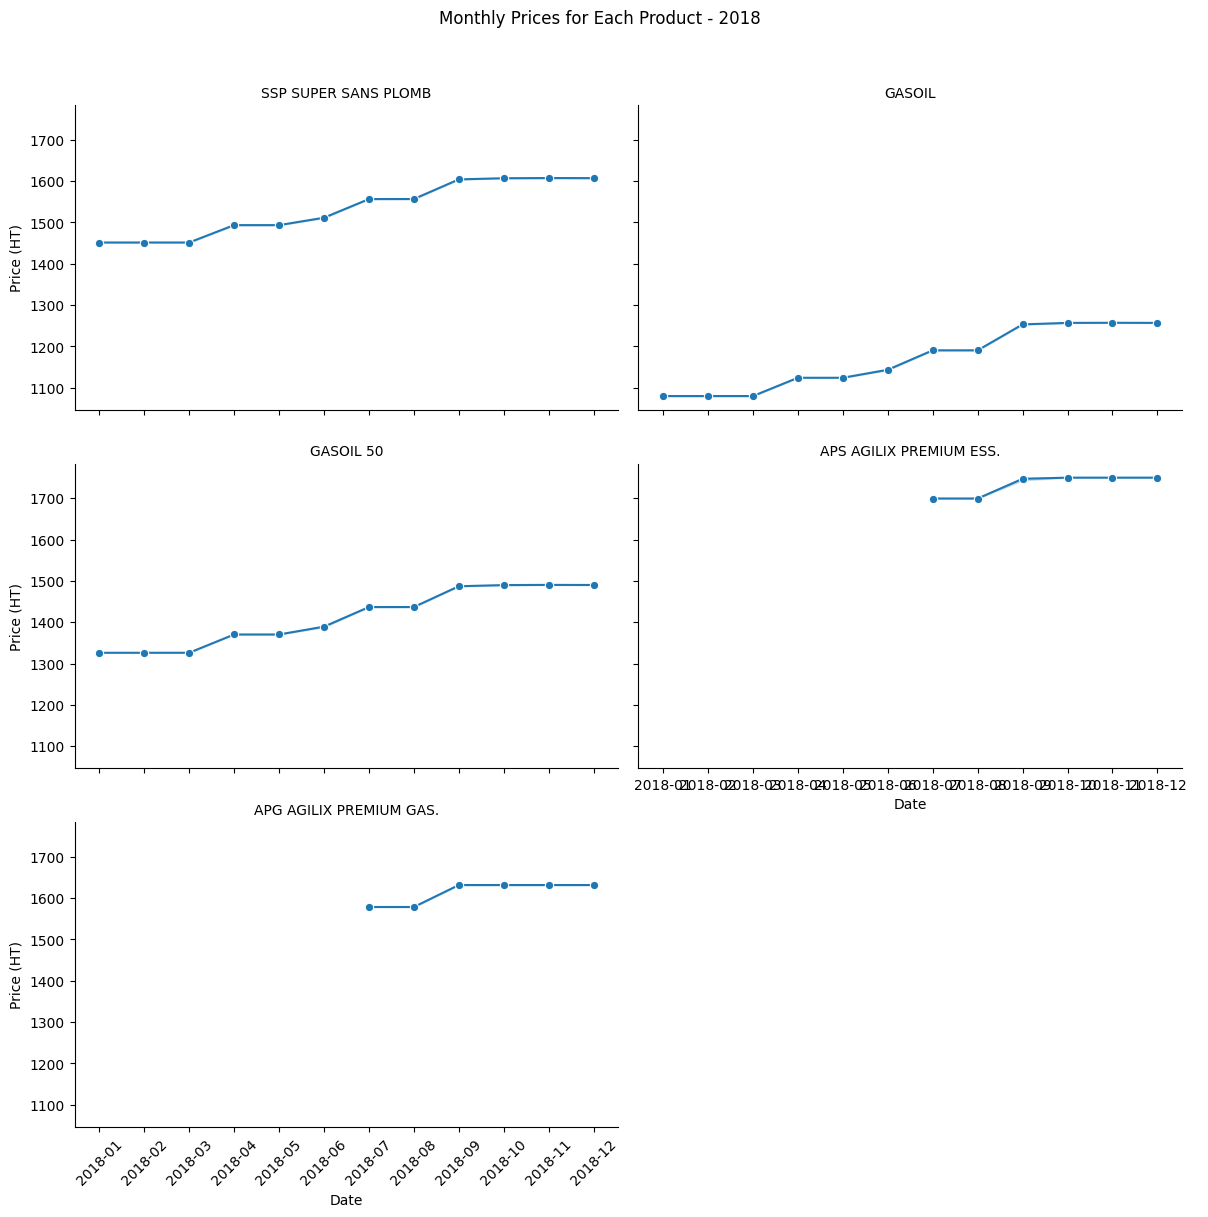

In [55]:
df['DATLIV'] = pd.to_datetime(df['DATLIV'], format='%d/%m/%Y')
df['Month_Year'] = df['DATLIV'].dt.to_period('M')
df['Month_Year_Str'] = df['Month_Year'].astype(str)

mask = (df['DATLIV'].dt.year >= 2018) & (df['DATLIV'].dt.year <= 2018)

df_filtered_2018 = df[mask]
df_filtered_2018= df_filtered_2018.sort_values(by="DATLIV")

g = sns.FacetGrid(df_filtered_2018, col="LIBPRD", col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, "Month_Year_Str", "prixHT", marker='o')
g.set_axis_labels("Date", "Price (HT)")
g.set_titles("{col_name}")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Prices for Each Product - 2018')
plt.xticks(rotation=45)
plt.show()

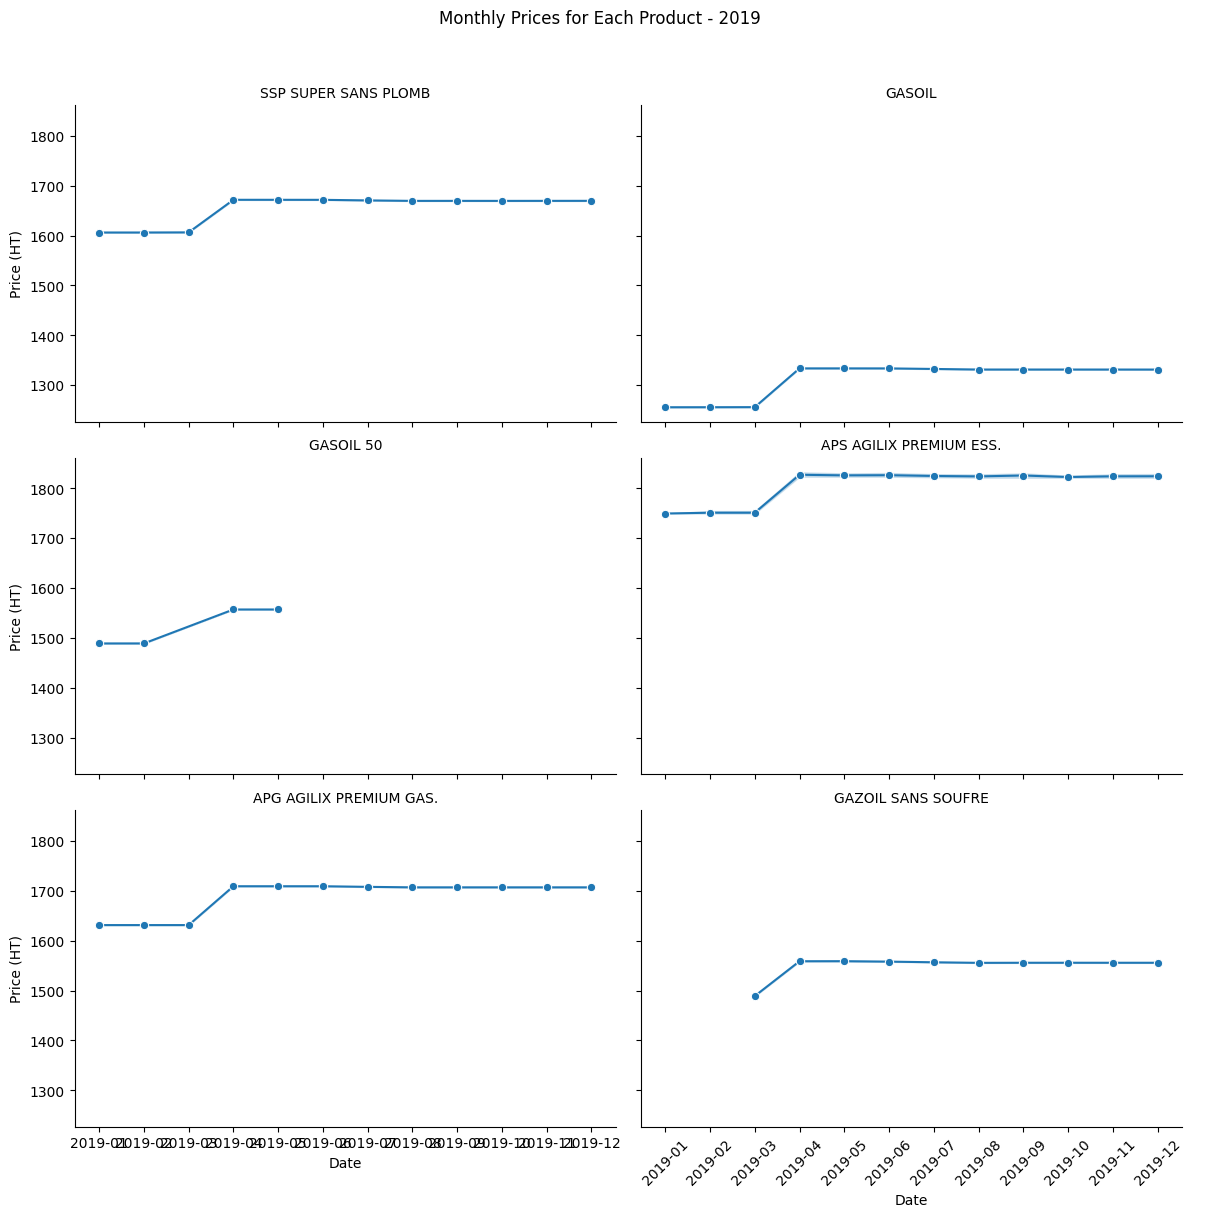

In [56]:
df['DATLIV'] = pd.to_datetime(df['DATLIV'], format='%d/%m/%Y')
df['Month_Year'] = df['DATLIV'].dt.to_period('M')
df['Month_Year_Str'] = df['Month_Year'].astype(str)

mask = (df['DATLIV'].dt.year >= 2019) & (df['DATLIV'].dt.year <= 2019)

df_filtered_2019 = df[mask]
df_filtered_2019= df_filtered_2019.sort_values(by="DATLIV")

g = sns.FacetGrid(df_filtered_2019, col="LIBPRD", col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, "Month_Year_Str", "prixHT", marker='o')
g.set_axis_labels("Date", "Price (HT)")
g.set_titles("{col_name}")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Prices for Each Product - 2019')
plt.xticks(rotation=45)
plt.show()

## <i>Interpretation</i>
-There is a notable variation in the quantity of fuel delivered each month and especially for <b>Aug-18 </b>After refering to the 'monthly prices for each product' graph, we can interpret that this spike is  relevant <b>to the increase of fuel price in sept-18</b>
<br>
-There could be times of year when fuel demand increases, perhaps due to holidays or weather changes and this happened especially during summer vacation (July-19,Aug-19,Aug-18)



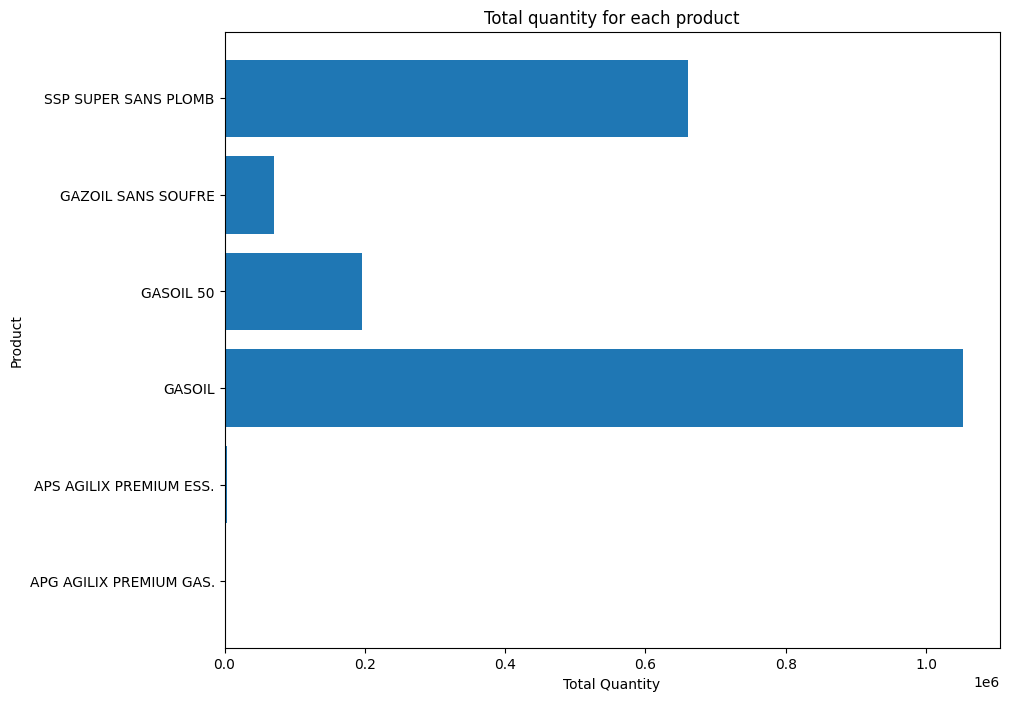

In [57]:
import matplotlib.pyplot as plt

# Calculer la quantité totale de carburant livré pour chaque produit
df_somme_produit = df.groupby(["LIBPRD"])["QTEPRD"].sum()
# Créer un bar plot pour chaque produit

plt.figure(figsize=(10, 8))
plt.barh(df_somme_produit.index, df_somme_produit)
plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.title('Total quantity for each product')
plt.show()